In [1]:
import pandas as pd
import csv
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
import matplotlib.gridspec as gridspec

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
dn_features =pd.read_csv('dn_features.csv')
dn_features.head()

,names,0,1,2,3,4,5,6,7,8,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
0,52+8-masked-6.jpg,-0.174113,1.302382,0.739442,0.661988,-0.717616,0.197712,1.145139,-0.388515,0.546552,...,-0.521628,-0.480063,-0.582739,0.457675,-0.805735,-0.411138,0.507768,-0.359012,6,sunglasses
1,32+10-masked-11.jpg,0.207674,1.205854,0.984380,0.609689,-0.583347,0.520938,1.082709,-0.674359,0.835891,...,-0.487500,-0.465315,-0.562000,0.512028,-0.795515,-0.413199,0.613972,-0.358941,11,headwear
2,66+29-masked-8.jpg,1.567145,-0.186237,0.969132,-0.074707,1.244366,0.096070,-0.943365,-0.137104,0.023253,...,-0.307409,-0.310132,-0.615838,-1.636990,-0.814323,-0.097262,-0.941905,-0.439168,8,top
3,27+16-masked-4.jpg,1.157446,0.421917,1.905508,0.416589,0.616664,0.224898,-0.916906,-0.605427,-0.077843,...,-0.173303,-0.268863,-0.599134,-1.567516,-0.642764,-0.083700,-0.902006,-0.362542,4,outer
4,72+26-masked-4.jpg,1.577672,-0.087967,1.474612,-0.157816,1.149329,0.391099,-0.318556,-0.306075,-0.100767,...,0.287064,0.299085,-0.468296,-1.214894,-0.319713,0.000934,-0.225988,-0.279379,4,outer


In [3]:
###
dn_features['labels'] =dn_features['names']
dn_features.head()

,names,0,1,2,3,4,5,6,7,8,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
0,52+8-masked-6.jpg,-0.174113,1.302382,0.739442,0.661988,-0.717616,0.197712,1.145139,-0.388515,0.546552,...,-0.521628,-0.480063,-0.582739,0.457675,-0.805735,-0.411138,0.507768,-0.359012,52+8-masked-6.jpg,sunglasses
1,32+10-masked-11.jpg,0.207674,1.205854,0.984380,0.609689,-0.583347,0.520938,1.082709,-0.674359,0.835891,...,-0.487500,-0.465315,-0.562000,0.512028,-0.795515,-0.413199,0.613972,-0.358941,32+10-masked-11.jpg,headwear
2,66+29-masked-8.jpg,1.567145,-0.186237,0.969132,-0.074707,1.244366,0.096070,-0.943365,-0.137104,0.023253,...,-0.307409,-0.310132,-0.615838,-1.636990,-0.814323,-0.097262,-0.941905,-0.439168,66+29-masked-8.jpg,top
3,27+16-masked-4.jpg,1.157446,0.421917,1.905508,0.416589,0.616664,0.224898,-0.916906,-0.605427,-0.077843,...,-0.173303,-0.268863,-0.599134,-1.567516,-0.642764,-0.083700,-0.902006,-0.362542,27+16-masked-4.jpg,outer
4,72+26-masked-4.jpg,1.577672,-0.087967,1.474612,-0.157816,1.149329,0.391099,-0.318556,-0.306075,-0.100767,...,0.287064,0.299085,-0.468296,-1.214894,-0.319713,0.000934,-0.225988,-0.279379,72+26-masked-4.jpg,outer


In [4]:
### extracting the label from the name 

dn_features.set_index('names',inplace = True)
dn_features.head()

,0,1,2,3,4,5,6,7,8,9,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
52+8-masked-6.jpg,-0.174113,1.302382,0.739442,0.661988,-0.717616,0.197712,1.145139,-0.388515,0.546552,-0.112082,...,-0.521628,-0.480063,-0.582739,0.457675,-0.805735,-0.411138,0.507768,-0.359012,52+8-masked-6.jpg,sunglasses
32+10-masked-11.jpg,0.207674,1.205854,0.984380,0.609689,-0.583347,0.520938,1.082709,-0.674359,0.835891,0.110636,...,-0.487500,-0.465315,-0.562000,0.512028,-0.795515,-0.413199,0.613972,-0.358941,32+10-masked-11.jpg,headwear
66+29-masked-8.jpg,1.567145,-0.186237,0.969132,-0.074707,1.244366,0.096070,-0.943365,-0.137104,0.023253,1.399339,...,-0.307409,-0.310132,-0.615838,-1.636990,-0.814323,-0.097262,-0.941905,-0.439168,66+29-masked-8.jpg,top
27+16-masked-4.jpg,1.157446,0.421917,1.905508,0.416589,0.616664,0.224898,-0.916906,-0.605427,-0.077843,1.382010,...,-0.173303,-0.268863,-0.599134,-1.567516,-0.642764,-0.083700,-0.902006,-0.362542,27+16-masked-4.jpg,outer
72+26-masked-4.jpg,1.577672,-0.087967,1.474612,-0.157816,1.149329,0.391099,-0.318556,-0.306075,-0.100767,1.401589,...,0.287064,0.299085,-0.468296,-1.214894,-0.319713,0.000934,-0.225988,-0.279379,72+26-masked-4.jpg,outer


In [6]:
for i in range(len(dn_features['labels'])):
    dn_features['labels'][i] = str(dn_features['labels'][i]).split('-')[2].split('.')[0]
    
# consideR:
#df['name'] = df['name'].map(lambda name: name.upper())

In [89]:
dn_features.sort_values(by = ['labels'], inplace = True)
dn_features.tail()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
names,,,,,,,,,,,,,,,,,,,,,
65+7-masked-9.jpg,0.047722,0.082846,0.586820,1.336692,1.050417,0.000000,0.241135,0.811914,0.000000,0.005212,...,1.029391,0.007348,1.470759,0.165182,0.772321,1.793764,1.119795,0.028602,0.000000,9
41+22-masked-9.jpg,0.337964,0.024706,0.360439,0.588007,1.734925,0.075858,0.469600,1.334270,0.000000,0.206097,...,0.332651,0.000000,0.582790,0.474913,1.937069,0.061942,0.000000,0.245986,0.000000,9
4+14-masked-9.jpg,0.109031,0.262453,0.177604,0.024994,0.320121,0.496336,0.590219,0.380088,0.000000,0.067255,...,0.012938,0.065692,0.029722,0.557737,0.001658,0.100606,0.325412,0.435494,0.308591,9
3+13-masked-9.jpg,0.004437,0.272938,0.249215,0.717473,0.396826,0.032878,0.548148,0.169649,0.000000,0.283506,...,0.763805,0.027221,0.593950,1.343069,0.368134,0.017728,1.181329,1.161139,0.000000,9
3+30-masked-9.jpg,0.176470,0.201181,0.248719,0.249853,0.303501,0.089771,1.010062,0.797112,0.052238,0.213755,...,0.905460,0.075307,1.442065,0.215302,0.003244,0.543045,0.092771,1.164717,0.010617,9


In [7]:
dn_features['label names']=dn_features['labels']
dn_features.tail()

,0,1,2,3,4,5,6,7,8,9,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
processed0+20-masked-8.jpg,-0.025842,-0.016697,0.031156,0.022581,-0.094388,-0.029730,-0.107132,-0.007843,0.031543,-0.076748,...,-0.082476,-0.027566,-0.071987,-0.053112,-0.019414,-0.181868,-0.014039,-0.045290,8,8
62+30-masked-7.jpg,-0.043648,-0.019997,0.015820,0.023814,-0.105285,-0.044145,-0.107658,-0.008068,0.030089,-0.109419,...,-0.068206,-0.019790,-0.067450,-0.027549,-0.011134,-0.194617,-0.012222,-0.042235,7,7
28+4-masked-1.jpg,-0.045468,-0.015717,0.019973,0.026459,-0.102399,-0.037234,-0.103024,-0.009764,0.031468,-0.107400,...,-0.083991,-0.033221,-0.071706,-0.035314,-0.022456,-0.189598,-0.007305,-0.047033,1,1
73+28-masked-8.jpg,-0.028012,-0.030386,0.021035,-0.013805,-0.082992,-0.013350,-0.111142,0.030005,-0.000036,-0.080129,...,-0.109617,-0.072275,-0.035224,-0.038648,0.005950,-0.116347,-0.005987,0.010343,8,8
24+21-masked-4.jpg,-0.025500,-0.017331,0.030268,0.018042,-0.096906,-0.033052,-0.103536,-0.003260,0.032792,-0.082309,...,-0.080349,-0.029178,-0.073088,-0.048114,-0.019984,-0.186030,-0.011570,-0.047370,4,4


In [10]:
# load label to names mapping for visualization purposes
labels_to_names = {1: 'bag', 2: 'belt', 3: 'boots', 4: 'footwear', 5: 'outer', 6: 'dress', 7: 'sunglasses', 8: 'pants', 9: 'top', 10: 'shorts', 11: 'skirt', 12: 'headwear', 13: 'scarf/tie'}
labels_to_names[2]

'belt'

In [13]:
for i in range(len(dn_features['labels'])):
     dn_features['label names'][i] = labels_to_names[int(dn_features['labels'][i])+1]
    

In [162]:
dn_features.tail()

,0,1,2,3,4,5,6,7,8,9,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
processed0+20-masked-8.jpg,-0.025842,-0.016697,0.031156,0.022581,-0.094388,-0.029730,-0.107132,-0.007843,0.031543,-0.076748,...,-0.082476,-0.027566,-0.071987,-0.053112,-0.019414,-0.181868,-0.014039,-0.045290,8,top
62+30-masked-7.jpg,-0.043648,-0.019997,0.015820,0.023814,-0.105285,-0.044145,-0.107658,-0.008068,0.030089,-0.109419,...,-0.068206,-0.019790,-0.067450,-0.027549,-0.011134,-0.194617,-0.012222,-0.042235,7,pants
28+4-masked-1.jpg,-0.045468,-0.015717,0.019973,0.026459,-0.102399,-0.037234,-0.103024,-0.009764,0.031468,-0.107400,...,-0.083991,-0.033221,-0.071706,-0.035314,-0.022456,-0.189598,-0.007305,-0.047033,1,belt
73+28-masked-8.jpg,-0.028012,-0.030386,0.021035,-0.013805,-0.082992,-0.013350,-0.111142,0.030005,-0.000036,-0.080129,...,-0.109617,-0.072275,-0.035224,-0.038648,0.005950,-0.116347,-0.005987,0.010343,8,top
24+21-masked-4.jpg,-0.025500,-0.017331,0.030268,0.018042,-0.096906,-0.033052,-0.103536,-0.003260,0.032792,-0.082309,...,-0.080349,-0.029178,-0.073088,-0.048114,-0.019984,-0.186030,-0.011570,-0.047370,4,outer


In [15]:
dn_features.to_csv('dn_features.csv')

In [5]:
dn_features = pd.read_csv('new_features_names.csv', index_col='names')
dn_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
54+14-masked-0.jpg,0.000000,0.628713,0.049154,0.084659,0.291767,0.176192,0.138081,0.635659,0.051259,0.495437,...,1.193870,1.458372,0.685477,0.000000,0.402774,0.068702,0.525575,0.000000,0,bag
55+5-masked-0.jpg,0.000000,0.112951,0.916327,0.547432,0.106296,0.061165,0.737093,0.322698,0.245354,0.259251,...,0.021937,0.864018,0.000000,0.000000,0.203484,0.062209,0.062978,0.000000,0,bag
56+27-masked-0.jpg,0.032500,0.229543,0.153241,0.427426,0.202888,0.046292,0.490080,0.354047,0.112013,0.355051,...,0.046166,0.963321,0.095918,0.000000,0.158652,0.000000,0.340487,0.017623,0,bag
41+7-masked-0.jpg,0.473770,0.410100,0.186851,0.705802,0.048155,0.054226,0.352429,0.550619,0.000000,0.624875,...,0.152404,0.540907,0.099566,0.313425,1.201367,0.022931,0.090065,0.131879,0,bag
18+21-masked-0.jpg,0.229182,0.448148,0.282578,0.613092,0.127565,0.103203,0.705114,0.693168,0.464673,0.304895,...,0.072795,0.553210,0.000768,0.889743,0.758679,0.006529,0.210188,0.050786,0,bag


In [4]:
### Grouping by classes 

label_counts = dn_features.groupby(['label names']).size().reset_index(name='counts')
label_counts

,label names,counts
0,bag,460
1,belt,312
2,boots,153
3,dress,18
4,footwear,2167
5,headwear,636
6,outer,1805
7,pants,2204
8,scarf/tie,72
9,shorts,48


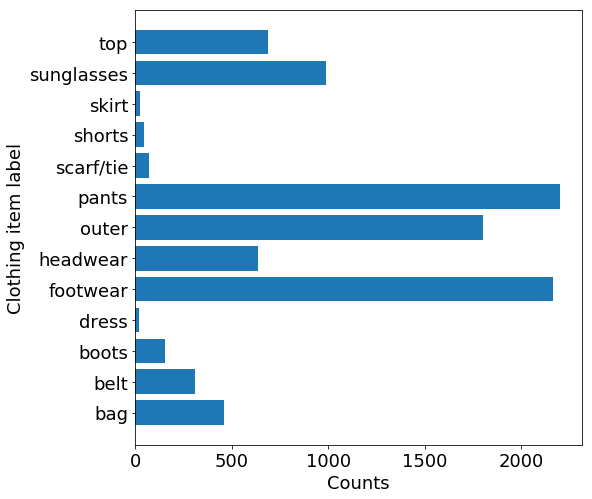

In [5]:
#plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.barh(label_counts['label names'], label_counts['counts'])

plt.xlabel('Counts', fontsize=18)
plt.ylabel('Clothing item label', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=18)

In [6]:
### User image identification and extraction 
!pip install keras_maskrcnn
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras
import keras_maskrcnn
import keras_retinanet 

# import keras_retinanet
from keras_maskrcnn import models
from keras_maskrcnn.utils.visualization import draw_mask
from keras_retinanet.utils.visualization import draw_box, draw_caption, draw_annotations
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import shutil 
import numpy as np
import time
import json



# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [10]:
### User image identification and extraction 

# adjust this to point to your downloaded/trained model
model_path = os.path.join('/home/ec2-user/SageMaker/inspo-book/', 'resnet50_modanet.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {1: 'bag', 2: 'belt', 3: 'boots', 4: 'footwear', 5: 'outer', 6: 'dress', 7: 'sunglasses', 8: 'pants', 9: 'top', 10: 'shorts', 11: 'skirt', 12: 'headwear', 13: 'scarf/tie'}








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
box_ind is deprecated, use box_indices instead









In [11]:
def cloth_identifier(input_imagefile):
  # load image
  image = read_image_bgr(input_imagefile)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  outputs = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  boxes  = outputs[-4][0]
  scores = outputs[-3][0]
  labels = outputs[-2][0]
  masks  = outputs[-1][0]

  # correct for image scale
  boxes /= scale

  masks_dic={}
  boxes_dic={}
  labels_dic={}
  counter=0

  # visualize detections
  for box, score, label, mask in zip(boxes, scores, labels, masks):
    if score < 0.5:
        break
    

    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    mask = mask[:, :, label]
    draw_mask(draw, b, mask, color=label_color(label))
    
    masks_dic[str(counter)]=mask
    boxes_dic[str(counter)]=box
    labels_dic[str(counter)]=label
    counter+=1

    #caption = "{} {:.3f}".format(labels_to_names[label], score)
    #draw_caption(draw, b, caption)
    
  #newfileneame=input_imagefile.split(".")[0]  
  #plt.ioff()
  #plt.figure(figsize=(15, 15))
  #plt.axis('off')
  #plt.imshow(draw)
  #plt.savefig(str('maskedimages/')+str(newfileneame)+'-masked'+'.jpg',bbox_inches='tight', pad_inches=0)
  #plt.close('all')
  #cwd = os.getcwd()

  
  #print(str(cwd)+'/'+'masked'+str(newfileneame)+'.jpg')
  #plt.show()
  

  

  return draw, masks_dic, boxes_dic, labels_dic



In [20]:
### This is the function to extract clothing items separately from an image, given 
### the image and masks and boxes (as dictionaries) extracted using the function 'cloth_identifier'
### and returns a separate image file for each identfied clothing, based on the masks

def cloth_extract(input_imagefile, masks_dic, boxes_dic, labels_dic):
    # load image
    image = read_image_bgr(input_imagefile)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # visualize detections

    items_dic={}
    counter=0

    for box, mask, label2 in zip(boxes_dic.values(), masks_dic.values(), labels_dic.values()):
        b = box.astype(int)

        # resize to fit the box
        mask = mask.astype(np.float32)
        mask = cv2.resize(mask, (b[2] - b[0], b[3] - b[1]))

        # binarize the mask
        mask = (mask > 0.5).astype(np.uint8)

        # draw the mask in the image
        mask_image = np.zeros((draw.shape[0], draw.shape[1]), np.uint8)
        mask_image[b[1]:b[3], b[0]:b[2]] = mask
        mask = mask_image

        mask = (np.stack([mask] * 3, axis = 2))*draw

        items_dic[str(counter)] = mask
        counter+=1
    
        #newfileneame=input_imagefile.split("/")[4].split('.')[0]
        plt.ioff()
        plt.figure(figsize=(15, 15))
        plt.axis('off')
        plt.imshow(mask)
        #plt.savefig('/home/ec2-user/SageMaker/'+str(newfileneame)+'-masked-'+str(label2)+'.jpg',bbox_inches='tight', pad_inches=0)
        #plt.show()
        plt.close('all')
        
    
  
  
  
    return mask, label2




In [17]:
### User image identification and extraction 

draw, masks_dic, boxes_dic, labels_dic = cloth_identifier('brown_pants.jpg')

processing time:  0.5475795269012451


In [18]:
labels_dic

{'0': 7}

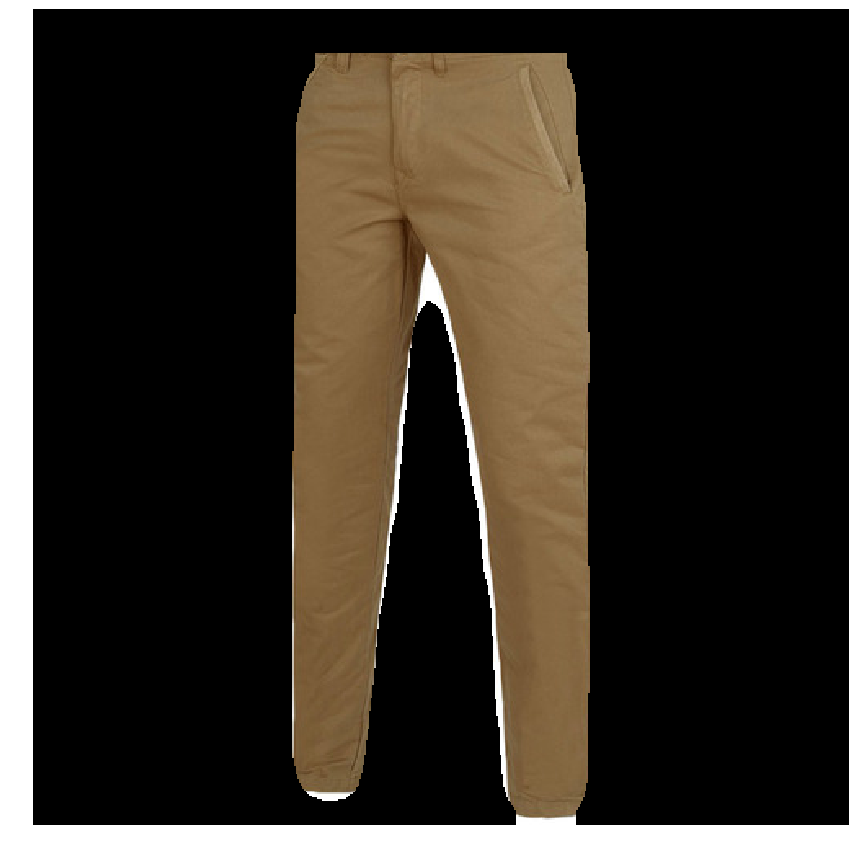

7


In [21]:
mask, label = cloth_extract('brown_pants.jpg', masks_dic, boxes_dic, labels_dic)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(mask)
plt.show()
#label_name=labels_to_names[label+1]
print(label)


In [49]:
labels_dic

{'0': 7}

In [50]:
label

7

In [22]:
## Converting the extracted np array to an image 

from PIL import Image
testimg = Image.fromarray(mask, 'RGB')
testimg = testimg.resize((224,224))
testimg.show()

In [23]:
## Converting test image to feature vector with InceptionV3

from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet', pooling = 'avg', include_top=False)
#model.summary()
from keras import Model
model1 = Model(inputs=model.inputs, outputs=model.layers[311].output)

#img_path = 'testimg'
#img = image.load_img(testimg, target_size=(224, 224))
img_data = image.img_to_array(testimg)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

testfeature = model1.predict(img_data)

print(testfeature.shape)




87916544/87910968 [==============================] - 5s 0us/step
(1, 2048)


In [24]:
## Converting test image to feature vector with DenseNet121

from keras.preprocessing import image
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
import numpy as np

model = DenseNet121(weights='imagenet', pooling = 'avg', include_top=True)
from keras import Model
model1 = Model(inputs=model.inputs, outputs=model.layers[420].output)

#img = image.load_img(items_dic['0'], target_size=(224, 224))
img_data = image.img_to_array(testimg)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

testfeature = model1.predict(img_data)
testfeature = np.array(testfeature)
testfeature = testfeature.flatten()
print(testfeature.shape)


33193984/33188688 [==============================] - 2s 0us/step
(6272,)


In [25]:
dn_features = pd.read_csv('new_features_names.csv', index_col='names')
dn_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
54+14-masked-0.jpg,0.000000,0.628713,0.049154,0.084659,0.291767,0.176192,0.138081,0.635659,0.051259,0.495437,...,1.193870,1.458372,0.685477,0.000000,0.402774,0.068702,0.525575,0.000000,0,bag
55+5-masked-0.jpg,0.000000,0.112951,0.916327,0.547432,0.106296,0.061165,0.737093,0.322698,0.245354,0.259251,...,0.021937,0.864018,0.000000,0.000000,0.203484,0.062209,0.062978,0.000000,0,bag
56+27-masked-0.jpg,0.032500,0.229543,0.153241,0.427426,0.202888,0.046292,0.490080,0.354047,0.112013,0.355051,...,0.046166,0.963321,0.095918,0.000000,0.158652,0.000000,0.340487,0.017623,0,bag
41+7-masked-0.jpg,0.473770,0.410100,0.186851,0.705802,0.048155,0.054226,0.352429,0.550619,0.000000,0.624875,...,0.152404,0.540907,0.099566,0.313425,1.201367,0.022931,0.090065,0.131879,0,bag
18+21-masked-0.jpg,0.229182,0.448148,0.282578,0.613092,0.127565,0.103203,0.705114,0.693168,0.464673,0.304895,...,0.072795,0.553210,0.000768,0.889743,0.758679,0.006529,0.210188,0.050786,0,bag


In [26]:
testfeature = testfeature.reshape(1, -1)
testfeature = np.append(testfeature, label)
testfeature = np.append(testfeature, label)
testfeature = pd.Series(testfeature, index = dn_features.columns, name = 'test')
print(testfeature.shape)

ValueError: Length of passed values is 6274, index implies 2050

In [ ]:
features_withtest = dn_features.append(testfeature)
features_withtest.tail()

In [ ]:
### replace test label name with name instead of number 

features_withtest['label names'][features_withtest['label names'] == features_withtest['label names']['test'] ] = labels_to_names[features_withtest['label names']['test']+1]

In [ ]:
features_withtest.tail()

In [58]:
### Scaling

scaler = preprocessing.StandardScaler()
features_withtest.loc[:,'0':'2047'] = scaler.fit_transform(features_withtest.loc[:,'0':'2047'])

In [59]:
features_withtest.tail()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
41+22-masked-9.jpg,0.886142,-0.993439,0.100095,0.363245,5.878131,-0.662760,-0.144669,2.927077,-0.499913,-0.548129,...,-0.589224,-0.521256,0.456275,4.472468,-1.230255,-0.970490,-0.176735,-0.633262,9.0,shorts
4+14-masked-9.jpg,-0.183945,-0.016689,-0.458369,-0.819176,-0.114581,0.625623,0.224560,-0.112966,-0.499913,-1.071528,...,-0.345879,-1.595726,0.672542,-0.648018,-1.162550,-0.275928,0.318750,0.263190,9.0,shorts
3+13-masked-9.jpg,-0.672843,0.026385,-0.239637,0.635145,0.210321,-0.794454,0.095776,-0.783430,-0.499913,-0.256316,...,-0.488387,-0.499577,2.723163,0.321561,-1.307678,1.550944,2.216003,-0.633262,9.0,shorts
3+30-masked-9.jpg,0.131279,-0.268417,-0.241149,-0.346935,-0.184981,-0.620128,1.509746,1.215682,-0.034913,-0.519260,...,-0.310264,1.148094,-0.221607,-0.643821,-0.387800,-0.772480,2.225359,-0.602419,9.0,shorts
test,-0.535843,1.139984,-0.550502,0.148070,0.165128,-0.434649,3.330402,0.030516,-0.322135,-0.674413,...,-0.299047,1.281645,-0.783795,-0.652405,1.103417,4.806829,2.343708,2.708662,7.0,pants


In [60]:
## new df with test and train images of same class

sample_df = features_withtest.loc[features_withtest['labels'] == label]
print(sample_df.shape)
sample_df.head()

(2205, 2050)


,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
53+29-masked-7.jpg,-0.393582,-0.160635,-0.879623,1.699656,-0.374812,-0.241762,-1.076016,-0.201003,2.624668,-0.621867,...,0.442608,-1.375188,1.522744,-0.612985,-1.302634,1.771572,0.254394,1.701997,7.0,pants
64+28-masked-7.jpg,-0.049726,1.184158,0.632246,-0.819851,-0.039679,-0.085209,-0.299301,1.004482,-0.499913,-1.187073,...,-0.534028,1.363392,-0.077764,-0.104222,-0.998673,0.790202,2.375278,-0.608125,7.0,pants
50+8-masked-7.jpg,-0.649841,-0.813614,0.861983,-0.077421,0.061892,-0.746593,-1.000375,0.346695,-0.481299,0.212548,...,-0.380416,-0.123037,2.233554,-0.181743,1.583256,2.204696,0.665848,-0.276320,7.0,pants
17+27-masked-7.jpg,-0.693581,0.152864,1.761972,0.622810,0.967539,-0.803562,0.157598,2.708906,-0.374253,-1.117031,...,-0.574924,0.680739,-0.417112,1.577105,1.683168,1.315955,3.661008,0.002303,7.0,pants
50+2-masked-7.jpg,-0.342976,-0.194844,-0.273587,-0.385717,-0.685907,0.094306,2.161455,0.637587,-0.045206,-1.213464,...,-0.395968,-1.230528,-0.741314,0.335286,1.544955,0.945957,-0.648338,0.239554,7.0,pants


In [61]:
 sample_df.iloc[-1:, :2048]

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
names,,,,,,,,,,,,,,,,,,,,,
test,-0.535843,1.139984,-0.550502,0.14807,0.165128,-0.434649,3.330402,0.030516,-0.322135,-0.674413,...,0.168406,0.241275,-0.299047,1.281645,-0.783795,-0.652405,1.103417,4.806829,2.343708,2.708662


In [62]:
### Cosine similarities between test and all train images of sample
from sklearn.metrics.pairwise import cosine_similarity
cos_val = cosine_similarity(sample_df.iloc[:, :2048], sample_df.iloc[-1:, :2048])


cos_val=cos_val.reshape(-1,)

In [63]:
sample_df['cosine'] = pd.Series(cos_val, index=sample_df.index)

In [64]:
sample_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,labels,label names,cosine
names,,,,,,,,,,,,,,,,,,,,,
36+28-masked-7.jpg,-0.276860,-0.887229,1.280057,0.227639,-0.608933,-0.857001,3.411832,-0.427324,-0.499913,-1.144347,...,-0.229015,-0.783795,0.619945,-0.945811,1.102924,1.316627,2.030287,7.0,pants,0.280766
68+23-masked-7.jpg,-0.657814,2.592720,-0.907335,1.811856,-1.320492,0.613242,-0.659336,-0.316753,1.375359,-0.792444,...,1.337561,-0.783795,-0.652405,-0.922491,-0.075402,-0.433923,1.560504,7.0,pants,0.016166
63+12-masked-7.jpg,0.001359,-0.123903,0.381828,0.962178,0.225436,-0.095651,1.529846,-0.622876,0.219652,-0.248499,...,-0.636909,-0.452172,0.459032,-0.738107,-0.786127,0.258980,-0.275903,7.0,pants,0.015139
11+26-masked-7.jpg,0.065297,1.914493,-0.554456,0.220327,0.095619,-0.503525,-0.009176,1.570171,0.294153,1.720587,...,2.749883,1.455427,0.402365,0.509233,1.763694,0.525865,-0.357473,7.0,pants,0.101174
test,-0.535843,1.139984,-0.550502,0.148070,0.165128,-0.434649,3.330402,0.030516,-0.322135,-0.674413,...,1.281645,-0.783795,-0.652405,1.103417,4.806829,2.343708,2.708662,7.0,pants,1.000000


In [65]:
sample_df_sort=sample_df.sort_values(by=['cosine'], ascending = False)
sample_df_sort.head()

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,labels,label names,cosine
names,,,,,,,,,,,,,,,,,,,,,
test,-0.535843,1.139984,-0.550502,0.148070,0.165128,-0.434649,3.330402,0.030516,-0.322135,-0.674413,...,1.281645,-0.783795,-0.652405,1.103417,4.806829,2.343708,2.708662,7.0,pants,1.000000
7+3-masked-7.jpg,-0.253488,-0.832297,-0.003253,0.472687,-0.303988,-0.618375,2.888707,-1.109529,0.878522,-1.302073,...,0.001954,-0.665278,-0.541201,-1.004757,-0.762308,0.585730,2.207612,7.0,pants,0.484052
44+5-masked-7.jpg,-0.625133,-0.936123,-0.348542,0.296898,-0.446843,-0.792086,1.382435,1.257600,-0.499913,-0.741871,...,-0.725914,-0.081461,-0.548801,3.315164,0.583701,1.090922,-0.401094,7.0,pants,0.437918
59+19-masked-7.jpg,-0.693581,-0.990538,-0.913057,0.842984,2.345185,-0.723979,1.749163,-1.055169,-0.064074,-0.780471,...,-1.002727,-0.778734,-0.652405,0.783171,-0.970490,-0.200559,2.438520,7.0,pants,0.414613
40+14-masked-7.jpg,-0.678518,-0.428085,-0.623071,-0.283029,0.058321,-0.068770,2.598584,-1.084227,-0.262252,-1.061764,...,-0.063292,-0.783795,-0.652405,0.998340,1.063365,0.400086,4.394848,7.0,pants,0.413159


In [66]:
#number of similar matches 
n = 8
number = n


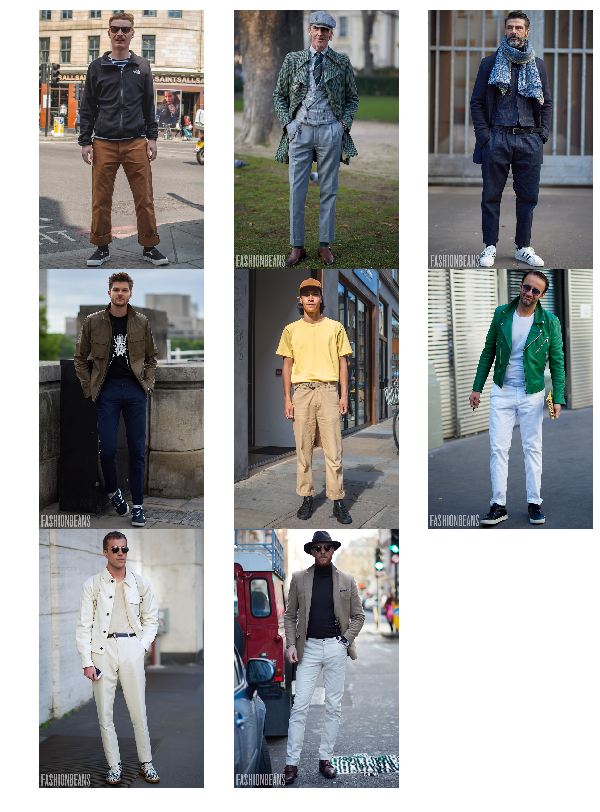

In [67]:
fig5 = plt.figure(constrained_layout=True,figsize=(12,12))

spec5 = gridspec.GridSpec(ncols=3, nrows=1+number//3)
spec5.update(wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 
counter=1
for row in range(1+number//3):
    for col in range(3):
        if counter < 1+number:
            ax = fig5.add_subplot(spec5[row, col])
            ax.imshow(mpimg.imread('/home/ec2-user/SageMaker/fashionbeans/processedimages/'+str(sample_df_sort.index[counter]).split('-')[0]+'.jpg'))
            ax.axis('off')
            
            counter+=1

plt.show()

In [150]:
## Manhattan distances

## new df with test and train images of same class

sample_df = features_withtest.loc[features_withtest['labels'] == label]
print(sample_df.shape)

### Manhattan distances between test and all train images of sample
from sklearn.metrics.pairwise import manhattan_distances
man_dis = manhattan_distances(sample_df.iloc[:, :2048], sample_df.iloc[-1:, :2048])
man_dis =man_dis.reshape(-1,)
sample_df['manhattan'] = pd.Series(man_dis, index=sample_df.index)

sample_df_sort=sample_df.sort_values(by=['manhattan'], ascending = True)
sample_df_sort.head()

(1806, 6274)


,0,1,2,3,4,5,6,7,8,9,...,6265,6266,6267,6268,6269,6270,6271,labels,label names,manhattan
names,,,,,,,,,,,,,,,,,,,,,
test,-0.027306,-0.104319,-0.077405,0.071435,-0.045693,-0.071868,0.083891,-0.012159,0.039934,-0.076655,...,0.004748,-0.010278,-0.095648,0.031688,-0.066304,-0.078833,0.032801,4.0,outer,0.000000
68+12-masked-4.jpg,-0.026667,-0.040404,0.016380,-0.013171,-0.084063,-0.020597,-0.121132,0.034619,0.004783,-0.084281,...,-0.030895,-0.075684,-0.001543,-0.022264,-0.062383,0.044762,-0.043448,4.0,outer,52.337291
74+5-masked-4.jpg,-0.024472,-0.031337,0.020614,-0.015152,-0.082834,-0.012984,-0.107081,0.034585,0.004508,-0.074364,...,-0.067169,-0.037325,-0.042503,0.009560,-0.115391,-0.013703,0.014826,4.0,outer,56.467885
56+3-masked-4.jpg,-0.024234,-0.034807,0.019592,-0.015710,-0.081938,-0.011525,-0.108990,0.032019,0.000938,-0.076364,...,-0.062163,-0.036285,-0.038944,0.012060,-0.112558,-0.011303,0.017770,4.0,outer,56.791167
73+23-masked-4.jpg,-0.022782,-0.032968,0.022668,-0.016312,-0.080475,-0.010434,-0.108412,0.033837,0.000153,-0.073697,...,-0.070610,-0.037647,-0.043049,0.008964,-0.113273,-0.013708,0.012625,4.0,outer,56.816608


68+12.jpg


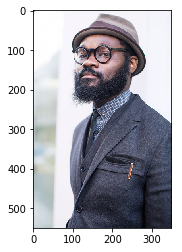

74+5.jpg


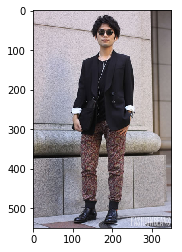

56+3.jpg


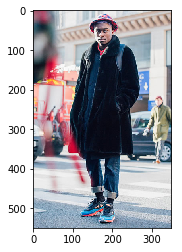

73+23.jpg


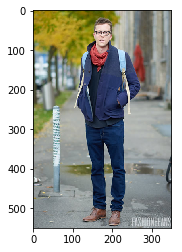

17+16.jpg


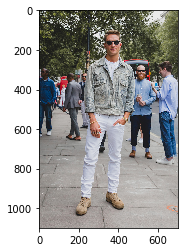

73+14.jpg


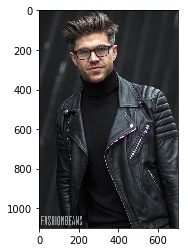

38+1.jpg


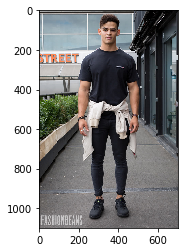

In [151]:
# Manhattan matches matches 

for i in range(8):
    if i > 0:
        print(str(sample_df_sort.index[i]).split('-')[0]+'.jpg')
        plt.imshow(mpimg.imread('/home/ec2-user/SageMaker/fashionbeans/processedimages/'+str(sample_df_sort.index[i]).split('-')[0]+'.jpg'))
        plt.show()